In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/TwiBot-20/Twibot-20.zip" "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: Twibot-20/
  inflating: Twibot-20/dev.json      
  inflating: Twibot-20/LICENSE       
  inflating: Twibot-20/README.txt    
  inflating: Twibot-20/support.json  
  inflating: Twibot-20/test.json     
  inflating: Twibot-20/train.json    
  inflating: Twibot-20/TwiBot-20 Seed Users.txt  


In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_json('/content/Twibot-20/train.json')
test = pd.read_json('/content/Twibot-20/test.json')
#support = pd.read_json('/content/Twibot-20/support.json')
#dev = pd.read_json('/content/Twibot-20/dev.json')

In [5]:
dev = pd.read_json('/content/Twibot-20/dev.json')

In [6]:
dev_profile = dev['profile']
dev_label = dev['label']
dev_tweet = dev[['tweet']]

In [7]:
train_profile = train['profile']
test_profile = test['profile']
y_train = train['label']
y_test = test['label']

In [8]:
train_tweet = train[['tweet']]
test_tweet = test[['tweet']]

In [9]:
train_tweet.head()

,tweet
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...
1,None
2,[RT @realDonaldTrump: THANK YOU #RNC2020! http...
3,[A family fears they may have been cheated out...
4,[RT @VonteThePlug: Yeah but he ain’t got one h...


In [10]:
import re

regexp = re.compile(r'(.*?) RT @(.*?):')

In [11]:
'''train_tweet.loc[:, 'DNA'] = ""

for i in range(len(train_tweet['tweet'])):
  l = train_tweet['tweet'][i]
  if l is not None:
    lis = train_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'C'
      else:
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'A' '''

'train_tweet.loc[:, \'DNA\'] = ""\n\nfor i in range(len(train_tweet[\'tweet\'])):\n  l = train_tweet[\'tweet\'][i]\n  if l is not None:\n    lis = train_tweet[\'tweet\'][i]\n    for j in range(len(lis)):\n      text = lis[j]\n      if text[0] == \'R\' and text[1] == \'T\':\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'T\'\n      elif text[0] == \'@\':\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'C\'\n      else:\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'A\' '

In [12]:


'''train_tweet.loc[:, 'DNA'] = ""

for i in range(len(train_tweet['tweet'])):
  l = train_tweet['tweet'][i]
  if l is not None:
    lis = train_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'T'
      elif bool(re.search(regexp, text)) == True:
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'Q'
      elif text[0] == '@':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'C'
      else:
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'A' '''

'train_tweet.loc[:, \'DNA\'] = ""\n\nfor i in range(len(train_tweet[\'tweet\'])):\n  l = train_tweet[\'tweet\'][i]\n  if l is not None:\n    lis = train_tweet[\'tweet\'][i]\n    for j in range(len(lis)):\n      text = lis[j]\n      if text[0] == \'R\' and text[1] == \'T\':\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'T\'\n      elif bool(re.search(regexp, text)) == True:\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'Q\'\n      elif text[0] == \'@\':\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'C\'\n      else:\n        train_tweet.loc[i, \'DNA\'] = train_tweet.loc[i, \'DNA\'] + \'A\' '

In [13]:
train_tweet.loc[:, 'DNA'] = ""

for i in range(len(train_tweet['tweet'])):
  l = train_tweet['tweet'][i]
  if l is not None:
    lis = train_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'T'
      elif bool(re.search(regexp, text)) == True:
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'C'
      else:
        train_tweet.loc[i, 'DNA'] = train_tweet.loc[i, 'DNA'] + 'A'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
''' test_tweet.loc[:, 'DNA'] = ""

for i in range(len(test_tweet['tweet'])):
  l = test_tweet['tweet'][i]
  if l is not None:
    lis = test_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'C'
      else:
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'A' '''

' test_tweet.loc[:, \'DNA\'] = ""\n\nfor i in range(len(test_tweet[\'tweet\'])):\n  l = test_tweet[\'tweet\'][i]\n  if l is not None:\n    lis = test_tweet[\'tweet\'][i]\n    for j in range(len(lis)):\n      text = lis[j]\n      if text[0] == \'R\' and text[1] == \'T\':\n        test_tweet.loc[i, \'DNA\'] = test_tweet.loc[i, \'DNA\'] + \'T\'\n      elif text[0] == \'@\':\n        test_tweet.loc[i, \'DNA\'] = test_tweet.loc[i, \'DNA\'] + \'C\'\n      else:\n        test_tweet.loc[i, \'DNA\'] = test_tweet.loc[i, \'DNA\'] + \'A\' '

In [15]:
test_tweet.loc[:, 'DNA'] = ""

for i in range(len(test_tweet['tweet'])):
  l = test_tweet['tweet'][i]
  if l is not None:
    lis = test_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'T'
      elif bool(re.search(regexp, text)) == True:
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'C'
      else:
        test_tweet.loc[i, 'DNA'] = test_tweet.loc[i, 'DNA'] + 'A'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
''' dev_tweet.loc[:, 'DNA'] = ""

for i in range(len(dev_tweet['tweet'])):
  l = dev_tweet['tweet'][i]
  if l is not None:
    lis = dev_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'C'
      else:
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'A' '''

' dev_tweet.loc[:, \'DNA\'] = ""\n\nfor i in range(len(dev_tweet[\'tweet\'])):\n  l = dev_tweet[\'tweet\'][i]\n  if l is not None:\n    lis = dev_tweet[\'tweet\'][i]\n    for j in range(len(lis)):\n      text = lis[j]\n      if text[0] == \'R\' and text[1] == \'T\':\n        dev_tweet.loc[i, \'DNA\'] = dev_tweet.loc[i, \'DNA\'] + \'T\'\n      elif text[0] == \'@\':\n        dev_tweet.loc[i, \'DNA\'] = dev_tweet.loc[i, \'DNA\'] + \'C\'\n      else:\n        dev_tweet.loc[i, \'DNA\'] = dev_tweet.loc[i, \'DNA\'] + \'A\' '

In [17]:
dev_tweet.loc[:, 'DNA'] = ""

for i in range(len(dev_tweet['tweet'])):
  l = dev_tweet['tweet'][i]
  if l is not None:
    lis = dev_tweet['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'T'
      elif bool(re.search(regexp, text)) == True:
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'C'
      else:
        dev_tweet.loc[i, 'DNA'] = dev_tweet.loc[i, 'DNA'] + 'A'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
import random
import sys
import time
import zlib
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def compress_dna_df(dna):
    '''Return a dataframe with compression facts for a series of dna.'''

    # Convert DNA in string object to bytes object.
    dna_bytes = dna['DNA'].apply(lambda s: s.encode('utf-8'))

    # Run compression on each DNA string in the sample.
    dna_compressed = dna_bytes.apply(lambda b: zlib.compress(b))

    # Create dataframe with compression facts.
    dna.loc[:, 'original_dna_size'] = dna_bytes.apply(sys.getsizeof)
    dna.loc[:,'compressed_dna_size'] = dna_compressed.apply(sys.getsizeof)
    
    dna.loc[:, 'compression_ratio'] = dna['original_dna_size'] / dna['compressed_dna_size']
    return dna

In [19]:
train_tweet_encoded = compress_dna_df(train_tweet)
test_tweet_encoded = compress_dna_df(test_tweet)
dev_tweet_encoded = compress_dna_df(dev_tweet)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [20]:
train_profile = pd.json_normalize(train_profile)
test_profile = pd.json_normalize(test_profile)

In [21]:
train_tweet_dna_features = train_tweet_encoded[['DNA']]
test_tweet_dna_features = test_tweet_encoded[['DNA']]

In [22]:
dev_tweet_dna_features = dev_tweet_encoded[['DNA']]

In [23]:
train_tweet_dna_features.head()

,DNA
0,TAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAATATCTCAAAC...
1,
2,TATTTAATATAATTTTATATTTTTATTTAATTTAAAAATTATTATT...
3,AAATTATTAATAATTATATTAAATTTAAATAATAAAATAATAATAT...
4,TTTTTTTTATTTAAAAAAAAAAATTTAATTAAAATTATTTTTTTTA...


In [24]:
training = pd.concat([train_tweet_dna_features, y_train], axis = 1)
testing = pd.concat([test_tweet_dna_features, y_test], axis = 1)

In [25]:
validate = pd.concat([dev_tweet_dna_features, dev_label], axis = 1)

In [26]:
all = pd.concat([training, testing], axis = 0)

In [27]:
#bots = all[all['label'] == 1]
#genuine = all[all['label'] == 0]
bots = validate[validate['label'] == 1]
genuine = validate[validate['label'] == 0]

In [28]:
bots = training[training['label'] == 1]
genuine = training[training['label'] == 0]

In [29]:
def getFreqOfTwoTuple(df, first, second):
  dfcp = df.copy()
  dfcp.loc[:, 'two_tuple_freq'] = 0
  for i in range(len(dfcp['DNA'])):
    dna = dfcp['DNA'][i]
    count = 0
    #print(dna)
    for j in range(len(dna)-1):
      #print(j, dna[j])
      if dna[j] == first and dna[j+1] == second:
        count += 1
    dfcp.loc[i, 'two_tuple_freq'] = count
    '''if(i == 1):
      print(count)
      break'''
  return dfcp

In [30]:
def getMaximumLengthOfTwoTupleRepeating(df, first, second):
  df_copy = df.copy()
  df_copy.loc[:, 'max_Length_of_Tuple_Repeating'] = 0
  for i in range(len(df_copy['DNA'])):
    dna = df_copy['DNA'][i]
    max = 0
    count = 0
    #print(dna)
    for j in range(len(dna)-1):
      #print(j, dna[j])
      if dna[j] == first and dna[j+1] == second:
        count += 1
      else:
        if count > max:
          max = count
        count = 0
    df_copy.loc[i, 'max_Length_of_Tuple_Repeating'] = max
    '''if(i == 1):
      print(count)
      break'''
  return df_copy

In [31]:
bots.reset_index(inplace = True, drop = True)

In [32]:
genuine.reset_index(inplace = True, drop = True)

In [33]:
bots.head()

,DNA,label
0,,1
1,TTTTTTTTATTTAAAAAAAAAAATTTAATTAAAATTATTTTTTTTA...,1
2,A,1
3,TTTTATTTTTTTTTTTAATATTATTATATTTATTAATTTTTTTTTT...,1
4,CTAAAATAAACCACCCTCCAAAAACCAAAAACAATCACCAAAAAAC...,1


In [34]:
genuine.head()

,DNA,label
0,TAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAATATCTCAAAC...,0
1,TATTTAATATAATTTTATATTTTTATTTAATTTAAAAATTATTATT...,0
2,AAATTATTAATAATTATATTAAATTTAAATAATAAAATAATAATAT...,0
3,TTAAAAAAAAAATAAAAAATAAAAATTAAAATAAAATAAATAAAAA...,0
4,ATAAACCAAATAAATATATAAAAAAAAAAAAAAATACTATTTAAAA...,0


In [35]:
AA_bots = getFreqOfTwoTuple(bots, 'A', 'A')
AC_bots = getFreqOfTwoTuple(bots, 'A', 'C')
AT_bots = getFreqOfTwoTuple(bots, 'A', 'T')
CC_bots = getFreqOfTwoTuple(bots, 'C', 'C')
CT_bots = getFreqOfTwoTuple(bots, 'C', 'T')
CA_bots = getFreqOfTwoTuple(bots, 'C', 'A')
TT_bots = getFreqOfTwoTuple(bots, 'T', 'T')
TC_bots = getFreqOfTwoTuple(bots, 'T', 'C')
TA_bots = getFreqOfTwoTuple(bots, 'T', 'A')

In [36]:
# AA_bots = getFreqOfTwoTuple(bots, 'A', 'A')
# AC_bots = getFreqOfTwoTuple(bots, 'A', 'C')
# AT_bots = getFreqOfTwoTuple(bots, 'A', 'T')
# AQ_bots = getFreqOfTwoTuple(bots, 'A', 'Q')

# CC_bots = getFreqOfTwoTuple(bots, 'C', 'C')
# CT_bots = getFreqOfTwoTuple(bots, 'C', 'T')
# CA_bots = getFreqOfTwoTuple(bots, 'C', 'A')
# CQ_bots = getFreqOfTwoTuple(bots, 'C', 'Q')

# TT_bots = getFreqOfTwoTuple(bots, 'T', 'T')
# TC_bots = getFreqOfTwoTuple(bots, 'T', 'C')
# TA_bots = getFreqOfTwoTuple(bots, 'T', 'A')
# TQ_bots = getFreqOfTwoTuple(bots, 'T', 'Q')

# QQ_bots = getFreqOfTwoTuple(bots, 'Q', 'Q')
# QA_bots = getFreqOfTwoTuple(bots, 'Q', 'A')
# QC_bots = getFreqOfTwoTuple(bots, 'Q', 'C')
# QT_bots = getFreqOfTwoTuple(bots, 'Q', 'T')

In [37]:
AA_bots.head()

,DNA,label,two_tuple_freq
0,,1,0
1,TTTTTTTTATTTAAAAAAAAAAATTTAATTAAAATTATTTTTTTTA...,1,30
2,A,1,0
3,TTTTATTTTTTTTTTTAATATTATTATATTTATTAATTTTTTTTTT...,1,23
4,CTAAAATAAACCACCCTCCAAAAACCAAAAACAATCACCAAAAAAC...,1,75


In [38]:
#AA_bots = getMaximumLengthOfTwoTupleRepeating(bots, 'A', 'A')

In [39]:
#AA_bots.head()

In [40]:
AA_genuine = getFreqOfTwoTuple(genuine, 'A', 'A')
AC_genuine = getFreqOfTwoTuple(genuine, 'A', 'C')
AT_genuine = getFreqOfTwoTuple(genuine, 'A', 'T')

CC_genuine = getFreqOfTwoTuple(genuine, 'C', 'C')
CT_genuine = getFreqOfTwoTuple(genuine, 'C', 'T')
CA_genuine = getFreqOfTwoTuple(genuine, 'C', 'A')

TT_genuine = getFreqOfTwoTuple(genuine, 'T', 'T')
TC_genuine = getFreqOfTwoTuple(genuine, 'T', 'C')
TA_genuine = getFreqOfTwoTuple(genuine, 'T', 'A')


In [41]:
# AA_genuine = getFreqOfTwoTuple(genuine, 'A', 'A')
# AC_genuine = getFreqOfTwoTuple(genuine, 'A', 'C')
# AT_genuine = getFreqOfTwoTuple(genuine, 'A', 'T')
# AQ_genuine = getFreqOfTwoTuple(genuine, 'A', 'Q')

# CC_genuine = getFreqOfTwoTuple(genuine, 'C', 'C')
# CT_genuine = getFreqOfTwoTuple(genuine, 'C', 'T')
# CA_genuine = getFreqOfTwoTuple(genuine, 'C', 'A')
# CQ_genuine = getFreqOfTwoTuple(genuine, 'C', 'Q')

# TT_genuine = getFreqOfTwoTuple(genuine, 'T', 'T')
# TC_genuine = getFreqOfTwoTuple(genuine, 'T', 'C')
# TA_genuine = getFreqOfTwoTuple(genuine, 'T', 'A')
# TQ_genuine = getFreqOfTwoTuple(genuine, 'T', 'Q')

# QQ_genuine = getFreqOfTwoTuple(genuine, 'Q', 'Q')
# QA_genuine = getFreqOfTwoTuple(genuine, 'Q', 'A')
# QC_genuine = getFreqOfTwoTuple(genuine, 'Q', 'C')
# QT_genuine = getFreqOfTwoTuple(genuine, 'Q', 'T')

In [42]:
# QQ_genuine.describe()

In [43]:
# QQ_bots.describe()

In [44]:
AA_genuine.head()

,DNA,label,two_tuple_freq
0,TAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAATATCTCAAAC...,0,120
1,TATTTAATATAATTTTATATTTTTATTTAATTTAAAAATTATTATT...,0,30
2,AAATTATTAATAATTATATTAAATTTAAATAATAAAATAATAATAT...,0,82
3,TTAAAAAAAAAATAAAAAATAAAAATTAAAATAAAATAAATAAAAA...,0,118
4,ATAAACCAAATAAATATATAAAAAAAAAAAAAAATACTATTTAAAA...,0,71


In [45]:
#AA_genuine = getMaximumLengthOfTwoTupleRepeating(genuine, 'A', 'A')

In [46]:
AA_genuine.head()

,DNA,label,two_tuple_freq
0,TAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAATATCTCAAAC...,0,120
1,TATTTAATATAATTTTATATTTTTATTTAATTTAAAAATTATTATT...,0,30
2,AAATTATTAATAATTATATTAAATTTAAATAATAAAATAATAATAT...,0,82
3,TTAAAAAAAAAATAAAAAATAAAAATTAAAATAAAATAAATAAAAA...,0,118
4,ATAAACCAAATAAATATATAAAAAAAAAAAAAAATACTATTTAAAA...,0,71


In [47]:
AA_bots.describe()

,label,two_tuple_freq
count,4646.0,4646.000000
mean,1.0,41.322213
std,0.0,58.173059
min,1.0,0.000000
25%,1.0,1.000000
50%,1.0,13.000000
75%,1.0,57.000000
max,1.0,199.000000


In [48]:
AA_genuine.describe()

,label,two_tuple_freq
count,3632.0,3632.000000
mean,0.0,63.039097
std,0.0,60.579389
min,0.0,0.000000
25%,0.0,11.000000
50%,0.0,42.000000
75%,0.0,104.000000
max,0.0,199.000000


In [49]:
'''def getFreqOfTwoTuple(df, first, second, label):
  dfcp = df.copy()
  
  dfcp.loc[:, '2Tuple'] = first + second
  dfcp.loc[:, 'two_tuple_freq'] = 0
  if label == 1:
    dfcp.loc[:, 'label'] = 'Bot'
  else:
    dfcp.loc[:, 'label'] = 'Genuine'

  for i in range(len(dfcp['DNA'])):
    dna = dfcp['DNA'][i]
    count = 0
    #print(dna)
    for j in range(len(dna)-1):
      #print(j, dna[j])
      if dna[j] == first and dna[j+1] == second:
        count += 1
    dfcp.loc[i, 'two_tuple_freq'] = count
    
  return dfcp'''

"def getFreqOfTwoTuple(df, first, second, label):\n  dfcp = df.copy()\n  \n  dfcp.loc[:, '2Tuple'] = first + second\n  dfcp.loc[:, 'two_tuple_freq'] = 0\n  if label == 1:\n    dfcp.loc[:, 'label'] = 'Bot'\n  else:\n    dfcp.loc[:, 'label'] = 'Genuine'\n\n  for i in range(len(dfcp['DNA'])):\n    dna = dfcp['DNA'][i]\n    count = 0\n    #print(dna)\n    for j in range(len(dna)-1):\n      #print(j, dna[j])\n      if dna[j] == first and dna[j+1] == second:\n        count += 1\n    dfcp.loc[i, 'two_tuple_freq'] = count\n    \n  return dfcp"

In [50]:

AA_bots

,DNA,label,two_tuple_freq
0,,1,0
1,TTTTTTTTATTTAAAAAAAAAAATTTAATTAAAATTATTTTTTTTA...,1,30
2,A,1,0
3,TTTTATTTTTTTTTTTAATATTATTATATTTATTAATTTTTTTTTT...,1,23
4,CTAAAATAAACCACCCTCCAAAAACCAAAAACAATCACCAAAAAAC...,1,75
...,...,...,...
4641,AAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAATAAAAAAAAAA...,1,195
4642,CCCCCACCCCCCCCCCAACCCCCCCCCCCCCCCTCCCCCTCCCCCT...,1,1
4643,CAATCTACCCTATTTACCTTTTATTTTCTATTTATACTTTTTTTTT...,1,13
4644,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTCCCTCCCCCCCCC...,1,0


In [51]:
AA_bots_average_freq = AA_bots['two_tuple_freq'].mean()
AA_genuine_average_freq = AA_genuine['two_tuple_freq'].mean()

AC_bots_average_freq = AC_bots['two_tuple_freq'].mean()
AC_genuine_average_freq = AC_genuine['two_tuple_freq'].mean()

AT_bots_average_freq = AT_bots['two_tuple_freq'].mean()
AT_genuine_average_freq = AT_genuine['two_tuple_freq'].mean()



CA_bots_average_freq = CA_bots['two_tuple_freq'].mean()
CA_genuine_average_freq = CA_genuine['two_tuple_freq'].mean()

CC_bots_average_freq = CC_bots['two_tuple_freq'].mean()
CC_genuine_average_freq = CC_genuine['two_tuple_freq'].mean()

CT_bots_average_freq = CT_bots['two_tuple_freq'].mean()
CT_genuine_average_freq = CT_genuine['two_tuple_freq'].mean()



TA_bots_average_freq = TA_bots['two_tuple_freq'].mean()
TA_genuine_average_freq = TA_genuine['two_tuple_freq'].mean()

TC_bots_average_freq = TC_bots['two_tuple_freq'].mean()
TC_genuine_average_freq = TC_genuine['two_tuple_freq'].mean()

TT_bots_average_freq = TT_bots['two_tuple_freq'].mean()
TT_genuine_average_freq = TT_genuine['two_tuple_freq'].mean()




In [52]:
# AA_bots_average_freq = AA_bots['two_tuple_freq'].mean()
# AA_genuine_average_freq = AA_genuine['two_tuple_freq'].mean()

# AC_bots_average_freq = AC_bots['two_tuple_freq'].mean()
# AC_genuine_average_freq = AC_genuine['two_tuple_freq'].mean()

# AT_bots_average_freq = AT_bots['two_tuple_freq'].mean()
# AT_genuine_average_freq = AT_genuine['two_tuple_freq'].mean()

# AQ_bots_average_freq = AQ_bots['two_tuple_freq'].mean()
# AQ_genuine_average_freq = AQ_genuine['two_tuple_freq'].mean()

# CA_bots_average_freq = CA_bots['two_tuple_freq'].mean()
# CA_genuine_average_freq = CA_genuine['two_tuple_freq'].mean()

# CC_bots_average_freq = CC_bots['two_tuple_freq'].mean()
# CC_genuine_average_freq = CC_genuine['two_tuple_freq'].mean()

# CT_bots_average_freq = CT_bots['two_tuple_freq'].mean()
# CT_genuine_average_freq = CT_genuine['two_tuple_freq'].mean()

# CQ_bots_average_freq = CQ_bots['two_tuple_freq'].mean()
# CQ_genuine_average_freq = CQ_genuine['two_tuple_freq'].mean()

# TA_bots_average_freq = TA_bots['two_tuple_freq'].mean()
# TA_genuine_average_freq = TA_genuine['two_tuple_freq'].mean()

# TC_bots_average_freq = TC_bots['two_tuple_freq'].mean()
# TC_genuine_average_freq = TC_genuine['two_tuple_freq'].mean()

# TT_bots_average_freq = TT_bots['two_tuple_freq'].mean()
# TT_genuine_average_freq = TT_genuine['two_tuple_freq'].mean()

# TQ_bots_average_freq = TQ_bots['two_tuple_freq'].mean()
# TQ_genuine_average_freq = TQ_genuine['two_tuple_freq'].mean()

# QA_bots_average_freq = QA_bots['two_tuple_freq'].mean()
# QA_genuine_average_freq = QA_genuine['two_tuple_freq'].mean()

# QC_bots_average_freq = QC_bots['two_tuple_freq'].mean()
# QC_genuine_average_freq = QC_genuine['two_tuple_freq'].mean()

# QT_bots_average_freq = QT_bots['two_tuple_freq'].mean()
# QT_genuine_average_freq = QT_genuine['two_tuple_freq'].mean()

# QQ_bots_average_freq = QQ_bots['two_tuple_freq'].mean()
# QQ_genuine_average_freq = QQ_genuine['two_tuple_freq'].mean()

In [53]:
# QA_genuine_average_freq

In [54]:
AA_bots_std = AA_bots['two_tuple_freq'].std()
AA_genuine_std = AA_genuine['two_tuple_freq'].std()

AC_bots_std = AC_bots['two_tuple_freq'].std()
AC_genuine_std = AC_genuine['two_tuple_freq'].std()

AT_bots_std = AT_bots['two_tuple_freq'].std()
AT_genuine_std = AT_genuine['two_tuple_freq'].std()



CA_bots_std = CA_bots['two_tuple_freq'].std()
CA_genuine_std = CA_genuine['two_tuple_freq'].std()

CC_bots_std = CC_bots['two_tuple_freq'].std()
CC_genuine_std = CC_genuine['two_tuple_freq'].std()

CT_bots_std = CT_bots['two_tuple_freq'].std()
CT_genuine_std = CT_genuine['two_tuple_freq'].std()



TA_bots_std = TA_bots['two_tuple_freq'].std()
TA_genuine_std = TA_genuine['two_tuple_freq'].std()

TC_bots_std = TC_bots['two_tuple_freq'].std()
TC_genuine_std = TC_genuine['two_tuple_freq'].std()

TT_bots_std = TT_bots['two_tuple_freq'].std()
TT_genuine_std = TT_genuine['two_tuple_freq'].std()


In [55]:
# AA_bots_std = AA_bots['two_tuple_freq'].std()
# AA_genuine_std = AA_genuine['two_tuple_freq'].std()

# AC_bots_std = AC_bots['two_tuple_freq'].std()
# AC_genuine_std = AC_genuine['two_tuple_freq'].std()

# AT_bots_std = AT_bots['two_tuple_freq'].std()
# AT_genuine_std = AT_genuine['two_tuple_freq'].std()

# AQ_bots_std = AQ_bots['two_tuple_freq'].std()
# AQ_genuine_std = AQ_genuine['two_tuple_freq'].std()

# CA_bots_std = CA_bots['two_tuple_freq'].std()
# CA_genuine_std = CA_genuine['two_tuple_freq'].std()

# CC_bots_std = CC_bots['two_tuple_freq'].std()
# CC_genuine_std = CC_genuine['two_tuple_freq'].std()

# CT_bots_std = CT_bots['two_tuple_freq'].std()
# CT_genuine_std = CT_genuine['two_tuple_freq'].std()

# CQ_bots_std = CQ_bots['two_tuple_freq'].std()
# CQ_genuine_std = CQ_genuine['two_tuple_freq'].std()

# TA_bots_std = TA_bots['two_tuple_freq'].std()
# TA_genuine_std = TA_genuine['two_tuple_freq'].std()

# TC_bots_std = TC_bots['two_tuple_freq'].std()
# TC_genuine_std = TC_genuine['two_tuple_freq'].std()

# TT_bots_std = TT_bots['two_tuple_freq'].std()
# TT_genuine_std = TT_genuine['two_tuple_freq'].std()

# TQ_bots_std = TQ_bots['two_tuple_freq'].std()
# TQ_genuine_std = TQ_genuine['two_tuple_freq'].std()

# QA_bots_std = QA_bots['two_tuple_freq'].std()
# QA_genuine_std = QA_genuine['two_tuple_freq'].std()

# QC_bots_std = QC_bots['two_tuple_freq'].std()
# QC_genuine_std = QC_genuine['two_tuple_freq'].std()

# QT_bots_std = QT_bots['two_tuple_freq'].std()
# QT_genuine_std = QT_genuine['two_tuple_freq'].std()

# QQ_bots_std = QQ_bots['two_tuple_freq'].std()
# QQ_genuine_std = QQ_genuine['two_tuple_freq'].std()

In [56]:
avg_df = pd.DataFrame({'2Tuple' : ['AA', 'AA','AC', 'AC','AT', 'AT',  'CA', 'CA', 'CC', 'CC',  'CT', 'CT', 'TA', 'TA','TC', 'TC','TT', 'TT'], 
'Avg_Freq' : [AA_bots_average_freq,AA_genuine_average_freq, AC_bots_average_freq, 
AC_genuine_average_freq, 
AT_bots_average_freq ,
AT_genuine_average_freq ,


CA_bots_average_freq ,
CA_genuine_average_freq ,
CC_bots_average_freq ,
CC_genuine_average_freq ,
CT_bots_average_freq,
CT_genuine_average_freq,


TA_bots_average_freq ,
TA_genuine_average_freq ,
TC_bots_average_freq ,
TC_genuine_average_freq , TT_bots_average_freq,
TT_genuine_average_freq], 'label' : ['Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine']})

In [57]:
# df = pd.DataFrame({'2Tuple' : ['AA', 'AA','AC', 'AC','AT', 'AT', 'AQ', 'AQ', 'CA', 'CA', 'CC', 'CC', 'CQ', 'CQ', 'CT', 'CT', 'TA', 'TA','TC', 'TC','TT', 'TT', 'TQ', 'TQ', 'QA', 'QA', 'QC', 'QC', 'QT', 'QT', 'QQ', 'QQ'], 
# 'Avg_Freq' : [AA_bots_average_freq,AA_genuine_average_freq, AC_bots_average_freq, 
# AC_genuine_average_freq, 
# AT_bots_average_freq ,
# AT_genuine_average_freq ,
# AQ_bots_average_freq,
# AQ_genuine_average_freq,

# CA_bots_average_freq ,
# CA_genuine_average_freq ,
# CC_bots_average_freq ,
# CC_genuine_average_freq ,
# CT_bots_average_freq,
# CT_genuine_average_freq,
# CQ_bots_average_freq,
# CQ_genuine_average_freq,

# TA_bots_average_freq ,
# TA_genuine_average_freq ,
# TC_bots_average_freq ,
# TC_genuine_average_freq , TT_bots_average_freq,
# TT_genuine_average_freq,
# TQ_bots_average_freq,
# TQ_genuine_average_freq,
# QA_bots_average_freq,
# QA_genuine_average_freq,
# QC_bots_average_freq,
# QC_genuine_average_freq,
# QT_bots_average_freq,
# QT_genuine_average_freq,
# QQ_bots_average_freq,
# QQ_genuine_average_freq], 'label' : ['Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine', 'Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine']})

In [58]:
avg_df

,2Tuple,Avg_Freq,label
0,AA,41.322213,Bot
1,AA,63.039097,Genuine
2,AC,7.320491,Bot
3,AC,10.720264,Genuine
4,AT,9.883771,Bot
5,AT,14.470815,Genuine
6,CA,7.604176,Bot
7,CA,11.174009,Genuine
8,CC,25.046492,Bot
9,CC,25.818282,Genuine


In [59]:
df = pd.DataFrame({'2Tuple' : ['AA', 'AA','AC', 'AC','AT', 'AT', 'CA', 'CA', 'CC', 'CC',  'CT', 'CT', 'TA', 'TA','TC', 'TC','TT', 'TT'], 
'std' : [AA_bots_std,AA_genuine_std, AC_bots_std, 
AC_genuine_std, 
AT_bots_std ,
AT_genuine_std ,


CA_bots_std ,
CA_genuine_std ,
CC_bots_std ,
CC_genuine_std ,
CT_bots_std,
CT_genuine_std,


TA_bots_std ,
TA_genuine_std ,
TC_bots_std ,
TC_genuine_std , TT_bots_std,
TT_genuine_std], 'label' : ['Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine']})

In [60]:
# df = pd.DataFrame({'2Tuple' : ['AA', 'AA','AC', 'AC','AT', 'AT', 'AQ', 'AQ', 'CA', 'CA', 'CC', 'CC', 'CQ', 'CQ', 'CT', 'CT', 'TA', 'TA','TC', 'TC','TT', 'TT', 'TQ', 'TQ', 'QA', 'QA', 'QC', 'QC', 'QT', 'QT', 'QQ', 'QQ'], 
# 'std' : [AA_bots_std,AA_genuine_std, AC_bots_std, 
# AC_genuine_std, 
# AT_bots_std ,
# AT_genuine_std ,
# AQ_bots_std,
# AQ_genuine_std,

# CA_bots_std ,
# CA_genuine_std ,
# CC_bots_std ,
# CC_genuine_std ,
# CT_bots_std,
# CT_genuine_std,
# CQ_bots_std,
# CQ_genuine_std,

# TA_bots_std ,
# TA_genuine_std ,
# TC_bots_std ,
# TC_genuine_std , TT_bots_std,
# TT_genuine_std,
# TQ_bots_std,
# TQ_genuine_std,
# QA_bots_std,
# QA_genuine_std,
# QC_bots_std,
# QC_genuine_std,
# QT_bots_std,
# QT_genuine_std,
# QQ_bots_std,
# QQ_genuine_std], 'label' : ['Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine', 'Bot', 'Genuine', 'Bot', 'Genuine', 'Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine','Bot', 'Genuine']})

In [61]:
df

,2Tuple,std,label
0,AA,58.173059,Bot
1,AA,60.579389,Genuine
2,AC,9.341941,Bot
3,AC,11.500599,Genuine
4,AT,11.143078,Bot
5,AT,13.155228,Genuine
6,CA,9.602465,Bot
7,CA,11.814107,Genuine
8,CC,40.152803,Bot
9,CC,40.922555,Genuine


Text(0.5, 1.0, 'Standard Deviation of 2tuple in DNA for bot and non bot vs 2Tuple')

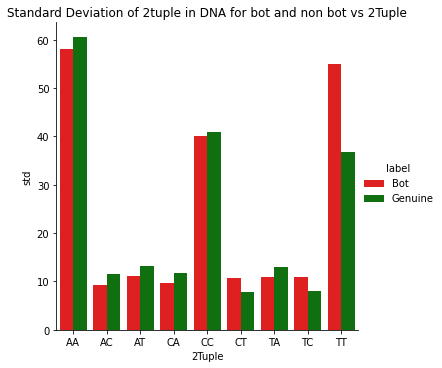

In [62]:
sns.catplot(data = df, kind = 'bar', x = '2Tuple',  y = 'std', hue = 'label', palette = ['r', 'g'])
plt.title("Standard Deviation of 2tuple in DNA for bot and non bot vs 2Tuple")
#plt.ylim([0, 5])

Text(0.5, 1.0, 'Mean of 2tuple in DNA for bot and non bot vs 2Tuple')

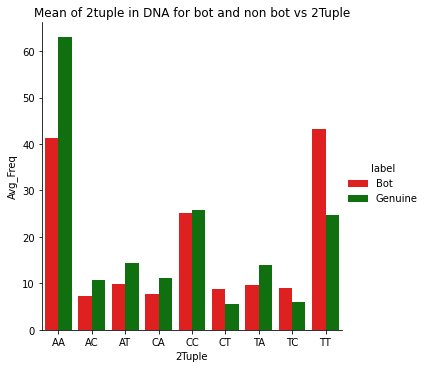

In [63]:
sns.catplot(data = avg_df, kind = 'bar', x = '2Tuple',  y = 'Avg_Freq', hue = 'label', palette = ['r', 'g'])
plt.title("Mean of 2tuple in DNA for bot and non bot vs 2Tuple")

In [64]:
AA_bots['two_tuple_freq'].value_counts()

0      929
1      280
2      201
3      155
4      133
      ... 
172      3
149      2
163      2
106      2
147      2
Name: two_tuple_freq, Length: 200, dtype: int64

In [65]:
AA_genuine['two_tuple_freq'].value_counts()

0      304
1       93
3       81
4       69
199     67
      ... 
173      4
152      3
196      2
131      2
141      1
Name: two_tuple_freq, Length: 199, dtype: int64

Text(0, 0.5, 'Density')

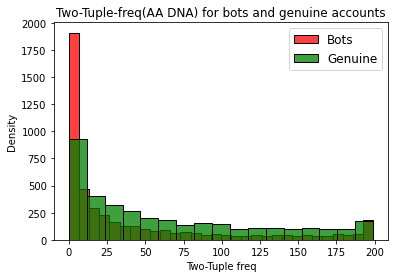

In [66]:
sns.histplot(AA_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(AA_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

In [67]:
sns.histplot(AA_bots['max_Length_of_Tuple_Repeating'],  label = 'Bots', color = 'red')
sns.histplot(AA_genuine['max_Length_of_Tuple_Repeating'], label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple--max_length_RepeatingAA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple-max_length_Repeating')
plt.ylabel('Density')

KeyError: ignored

In [68]:
plt.hist([AA_bots['max_Length_of_Tuple_Repeating'], AA_genuine['max_Length_of_Tuple_Repeating']], color=['red','green'])
plt.ylim((None, 100))

KeyError: ignored

In [69]:
AA_bots.describe()

,label,two_tuple_freq
count,4646.0,4646.000000
mean,1.0,41.322213
std,0.0,58.173059
min,1.0,0.000000
25%,1.0,1.000000
50%,1.0,13.000000
75%,1.0,57.000000
max,1.0,199.000000


In [70]:
AA_genuine.describe()

,label,two_tuple_freq
count,3632.0,3632.000000
mean,0.0,63.039097
std,0.0,60.579389
min,0.0,0.000000
25%,0.0,11.000000
50%,0.0,42.000000
75%,0.0,104.000000
max,0.0,199.000000


In [71]:
AA_bots['max_Length_of_Tuple_Repeating'].value_counts().to_frame().style.bar()

KeyError: ignored

In [72]:
AA_bots['max_Length_of_Tuple_Repeating'].value_counts().hist()

KeyError: ignored

In [73]:
TC_bots = getMaximumLengthOfTwoTupleRepeating(bots, 'T', 'C')
TC_genuine = getMaximumLengthOfTwoTupleRepeating(genuine, 'T', 'C')

In [74]:
TC_bots.head()

,DNA,label,max_Length_of_Tuple_Repeating
0,,1,0
1,TTTTTTTTATTTAAAAAAAAAAATTTAATTAAAATTATTTTTTTTA...,1,0
2,A,1,0
3,TTTTATTTTTTTTTTTAATATTATTATATTTATTAATTTTTTTTTT...,1,0
4,CTAAAATAAACCACCCTCCAAAAACCAAAAACAATCACCAAAAAAC...,1,1


Text(0, 0.5, 'Density')

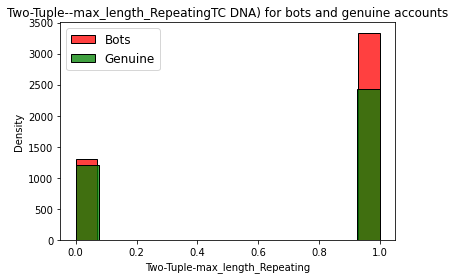

In [75]:
sns.histplot(TC_bots['max_Length_of_Tuple_Repeating'],  label = 'Bots', color = 'red')
sns.histplot(TC_genuine['max_Length_of_Tuple_Repeating'], label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple--max_length_RepeatingTC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple-max_length_Repeating')
plt.ylabel('Density')

In [76]:
TT_bots = getMaximumLengthOfTwoTupleRepeating(bots, 'T', 'T')
TT_genuine = getMaximumLengthOfTwoTupleRepeating(genuine, 'T', 'T')

Text(0, 0.5, 'Density')

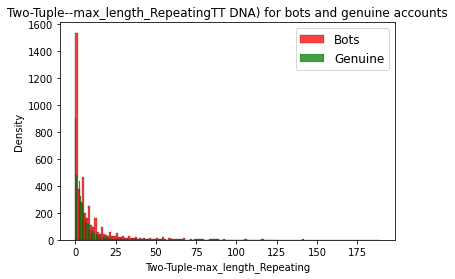

In [77]:
sns.histplot(TT_bots['max_Length_of_Tuple_Repeating'],  label = 'Bots', color = 'red')
sns.histplot(TT_genuine['max_Length_of_Tuple_Repeating'], label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple--max_length_RepeatingTT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple-max_length_Repeating')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

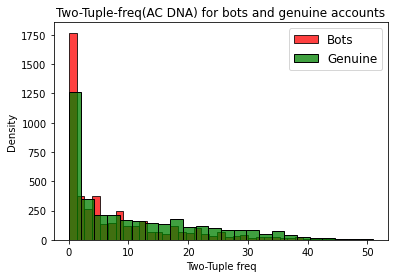

In [78]:
sns.histplot(AC_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(AC_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

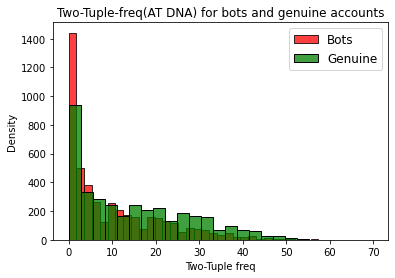

In [79]:
sns.histplot(AT_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(AT_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

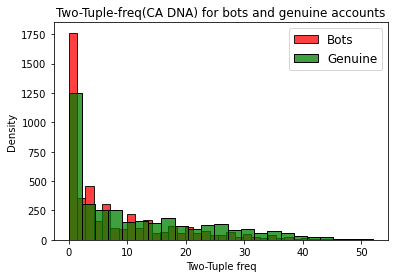

In [80]:
sns.histplot(CA_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(CA_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

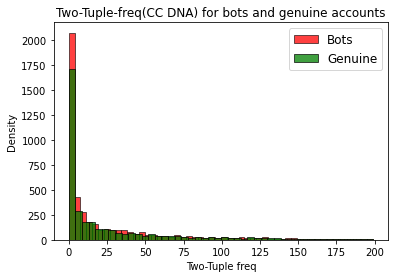

In [81]:
sns.histplot(CC_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(CC_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

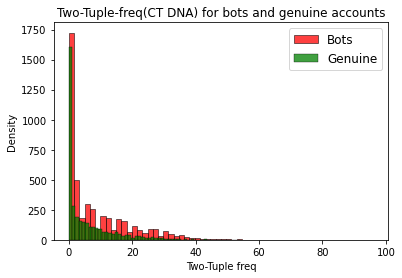

In [82]:
sns.histplot(CT_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(CT_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

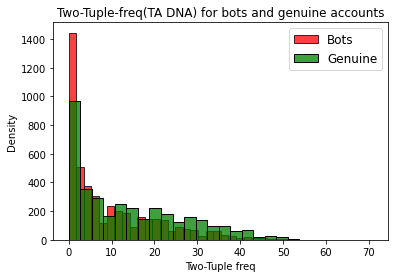

In [83]:
sns.histplot(TA_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(TA_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

In [84]:
sns.histplot(TC_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(TC_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

KeyError: ignored

In [ ]:
sns.histplot(TT_bots['two_tuple_freq'],label = 'Bots', color = 'red')
sns.histplot(TT_genuine['two_tuple_freq'],label = 'Genuine', color = 'green')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

In [ ]:
sns.countplot(AA_bots['two_tuple_freq'])

In [ ]:
AA_bots['two_tuple_freq'].hist()

In [ ]:
AA_genuine['two_tuple_freq'].hist()

In [ ]:
AA_bots['max_Length_of_Tuple_Repeating'].hist()

In [ ]:
AA_genuine['max_Length_of_Tuple_Repeating'].hist()

In [ ]:
AC_bots['two_tuple_freq'].hist()

In [ ]:
AC_genuine['two_tuple_freq'].hist()

In [ ]:
AT_bots['two_tuple_freq'].hist()

In [ ]:
AT_genuine['two_tuple_freq'].hist()

In [ ]:
CC_bots['two_tuple_freq'].hist()

In [ ]:
CC_genuine['two_tuple_freq'].hist()

In [ ]:
CA_bots['two_tuple_freq'].hist()

In [ ]:
CA_genuine['two_tuple_freq'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

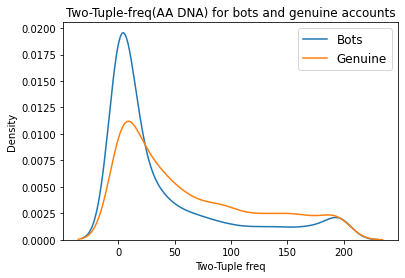

In [85]:
sns.distplot(AA_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(AA_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

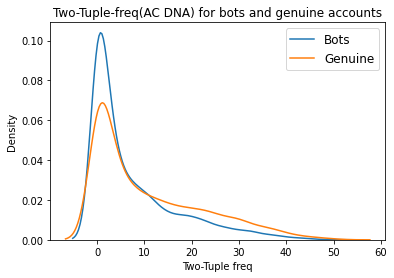

In [86]:
sns.distplot(AC_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(AC_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

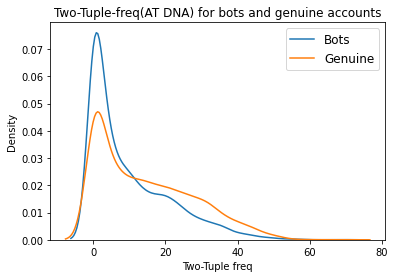

In [87]:
sns.distplot(AT_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(AT_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(AT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

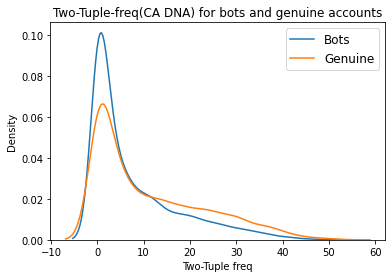

In [88]:
sns.distplot(CA_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(CA_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

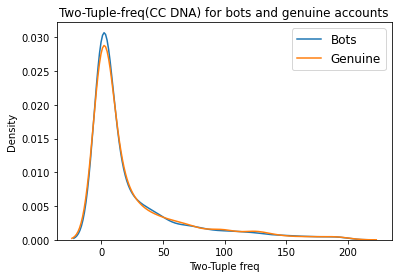

In [89]:
sns.distplot(CC_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(CC_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

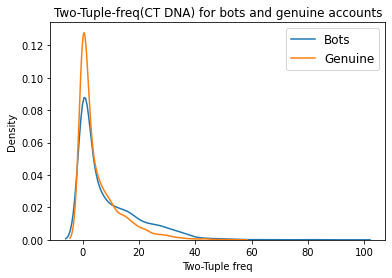

In [90]:
sns.distplot(CT_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(CT_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(CT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

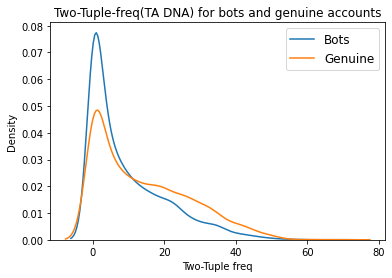

In [91]:
sns.distplot(TA_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(TA_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TA DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

In [92]:
sns.distplot(TC_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(TC_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TC DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

KeyError: ignored

In [ ]:
sns.distplot(TT_bots['two_tuple_freq'], hist=False,kde = True, label = 'Bots')
sns.distplot(TT_genuine['two_tuple_freq'], hist=False,kde = True, label = 'Genuine')
plt.legend(prop={'size': 12})
plt.title('Two-Tuple-freq(TT DNA) for bots and genuine accounts')
plt.xlabel('Two-Tuple freq')
plt.ylabel('Density')

In [ ]:
df = pd.data